In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/HP/Documents/data/train_users_2.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
print(data.head())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app 

In [5]:
print(data.isnull().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


In [6]:
data = data[(data['age'] >= 18) & (data['age'] <= 100)]
print(data['age'])

1         38.0
2         56.0
3         42.0
4         41.0
6         46.0
          ... 
213441    34.0
213443    36.0
213445    23.0
213446    32.0
213448    32.0
Name: age, Length: 122958, dtype: float64


In [7]:
data['date_first_booking'].fillna(data['date_account_created'], inplace=True)

In [8]:
data['age'] = data['age'].astype(int)

data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')
data['timestamp_first_active'] = data['timestamp_first_active'].dt.strftime('%Y-%m-%d')
print(data['timestamp_first_active'])

1         2009-05-23
2         2009-06-09
3         2009-10-31
4         2009-12-08
6         2010-01-02
             ...    
213441    2014-06-30
213443    2014-06-30
213445    2014-06-30
213446    2014-06-30
213448    2014-06-30
Name: timestamp_first_active, Length: 122958, dtype: object


In [9]:
data['date_account_created'] = pd.to_datetime(data['date_account_created'])
print(data['date_account_created'])

1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
6        2010-01-02
            ...    
213441   2014-06-30
213443   2014-06-30
213445   2014-06-30
213446   2014-06-30
213448   2014-06-30
Name: date_account_created, Length: 122958, dtype: datetime64[ns]


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
# /data.dropna(inplace=True)

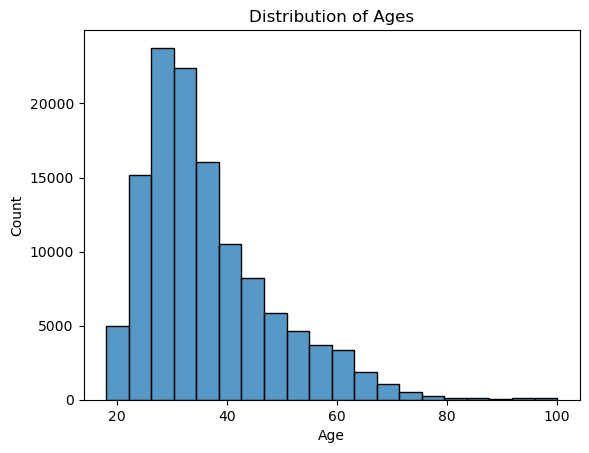

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of ages
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
print(data.isnull().sum())

id                            0
date_account_created          0
timestamp_first_active        0
date_first_booking            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    1960
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64


In [14]:
data.to_csv("cleaned_data_train-users.csv", index=False)